In [1]:
%load_ext autoreload
%autoreload

## make imports from pa_lib possible (parent directory of file's directory)
import sys
from pathlib import Path

file_dir = Path.cwd()
parent_dir = file_dir.parent
sys.path.append(str(parent_dir))

from pa_lib.data import as_dtype, clean_up_categoricals, select_rows
from pa_lib.types import dtFactor
from pa_lib.util import flat_list

# Import Uplift calculation (loads needed data)

In [2]:
from Uplift import Uplift

17:54:50 [INFO] Started loading data ...
17:54:50 [INFO] Started loading binary file ...
17:54:50 [INFO] Reading from file C:\Users\kpf\data\axinova\ax_data.feather
17:54:50 [INFO] ... finished loading binary file in 0.33s (1.19s CPU)
17:54:50 [INFO] Started loading binary file ...
17:54:50 [INFO] Reading from file C:\Users\kpf\data\axinova\ax_var_struct.feather
17:54:50 [INFO] ... finished loading binary file in 0.0s (0.0s CPU)
17:54:50 [INFO] Started loading pickle file ...
17:54:50 [INFO] Reading from file C:\Users\kpf\data\axinova\population_ratios.pkl
17:54:50 [INFO] ... finished loading pickle file in 0.0s (0.0s CPU)
17:54:50 [INFO] Started loading pickle file ...
17:54:50 [INFO] Reading from file C:\Users\kpf\data\axinova\global_code_ratios.pkl
17:54:50 [INFO] ... finished loading pickle file in 0.0s (0.0s CPU)
17:54:50 [INFO] Started loading pickle file ...
17:54:50 [INFO] Reading from file C:\Users\kpf\data\axinova\station_code_ratios.pkl
17:54:50 [INFO] ... finished loading p

# Initialize and calculate uplift

In [3]:
uplift_test = Uplift(
    name="Senioren ohne Autos",
    variables={"g_220": [0], "md_agenatrep": [3]},
    stations=[],
    time_scale="Hour",
)
print(uplift_test)

Name: 'Senioren ohne Autos'
Stations: ['Aarau', 'Basel SBB', 'Bellinzona', 'Bern', 'Biel/Bienne', 'Brig', 'Chur', 'Fribourg', 'Genève Aéroport', 'Genève Cornavin', 'Lausanne', 'Lugano', 'Luzern', 'M2', 'Neuchatel', 'Olten', 'St. Gallen', 'Winterthur', 'Zug', 'Zürich Enge', 'Zürich Flughafen', 'Zürich Flughafen - Airside', 'Zürich Flughafen - Landside', 'Zürich HB', 'Zürich Hardbrücke', 'Zürich Oerlikon', 'Zürich Stadelhofen']
Timescale: 'Hour'
Selection: 
'Anzahl Autos im Haushalt' = 'Keines'
 AND 'Alter nach 4 Kategorien' = '61+ Jahre'
Results per Variable: 
{}
Total Result: 
Empty DataFrame
Columns: []
Index: []


In [4]:
%%time
uplift_test.calculate()

Wall time: 3.19 s


# Store result table to Excel file

In [11]:
uplift_test.export_result()

18:03:57 [INFO] Started storing xlsx file ...
18:03:57 [INFO] Writing to file C:\Users\kpf\data\axinova\zielgruppen_export\Senioren ohne Autos 20200128_180357.xlsx
18:03:58 [INFO] Written 533.3 KB
18:03:58 [INFO] ... finished storing xlsx file in 0.86s (0.84s CPU)


# Find best slots by uplift vs. population

In [5]:
def best_pop_uplift_slots(report: Uplift, top_n: int = 20, lowest: bool = False):
    return report.result.loc[
        report.result["pop_uplift_pers"].rank(ascending=lowest) <= top_n
    ]

## Best slots

In [6]:
best_pop_uplift_slots(uplift_test, 20).sort_values(
    "pop_uplift_pers", ascending=False
).reset_index(drop=True)

,Station,DayOfWeek,Hour,spr,target_ratio,target_pers,pop_ratio,global_ratio,station_ratio,pop_uplift,global_uplift,station_uplift,pop_uplift_pers,glob_uplift_pers,stat_uplift_pers
0,Zürich HB,Sunday,14,66120.484538,0.108689,7186.550976,0.034256,0.044059,0.045849,0.074432,0.064630,0.062840,4921.512691,4273.360416,4155.001856
1,Zürich HB,Sunday,13,61105.385086,0.100268,6126.912281,0.034256,0.044059,0.045849,0.066012,0.056209,0.054419,4033.672378,3434.681088,3325.299775
2,Winterthur,Thursday,08,19224.812496,0.222865,4284.546018,0.034256,0.044059,0.064543,0.188609,0.178807,0.158323,3625.976489,3437.523455,3043.723015
3,Bern,Wednesday,18,55045.621996,0.090098,4959.508852,0.034256,0.044059,0.054798,0.055842,0.046039,0.035300,3073.853565,2534.263673,1943.121588
4,Bern,Monday,21,16808.214059,0.203801,3425.529551,0.034256,0.044059,0.054798,0.169545,0.159742,0.149003,2849.743565,2684.979465,2504.473871
5,Bern,Sunday,15,48412.144241,0.090664,4389.231003,0.034256,0.044059,0.054798,0.056408,0.046605,0.035866,2730.813632,2256.249030,1736.344725
6,Zürich HB,Sunday,12,54199.591592,0.084480,4578.778667,0.034256,0.044059,0.045849,0.050224,0.040421,0.038631,2722.105190,2190.808590,2093.788950
7,Zürich HB,Sunday,17,76508.660808,0.067403,5156.918347,0.034256,0.044059,0.045849,0.033147,0.023344,0.021554,2536.020345,1786.036994,1649.083143
8,Bern,Monday,10,25299.137082,0.133074,3366.645018,0.034256,0.044059,0.054798,0.098817,0.089015,0.078276,2499.992052,2251.994879,1980.304160
9,Basel SBB,Tuesday,19,15428.759189,0.189016,2916.278649,0.034256,0.044059,0.079166,0.154760,0.144957,0.109850,2387.747582,2236.505718,1694.841543


## Worst slots

In [7]:
best_pop_uplift_slots(uplift_test, 20, lowest=True).sort_values(
    "pop_uplift_pers", ascending=True
).reset_index(drop=True)

,Station,DayOfWeek,Hour,spr,target_ratio,target_pers,pop_ratio,global_ratio,station_ratio,pop_uplift,global_uplift,station_uplift,pop_uplift_pers,glob_uplift_pers,stat_uplift_pers
0,Zürich HB,Monday,17,96088.258877,0.018032,1732.660585,0.034256,0.044059,0.045849,-0.016224,-0.026027,-0.027817,-1558.960560,-2500.874764,-2672.876953
1,Zürich HB,Tuesday,08,58874.306632,0.014956,880.525664,0.034256,0.044059,0.045849,-0.019300,-0.029103,-0.030893,-1136.285910,-1713.406844,-1818.794429
2,Zürich HB,Thursday,07,61857.362881,0.016436,1016.669846,0.034256,0.044059,0.045849,-0.017821,-0.027623,-0.029413,-1102.329979,-1708.692602,-1819.419989
3,Zürich HB,Wednesday,17,96635.663495,0.023342,2255.627187,0.034256,0.044059,0.045849,-0.010915,-0.020717,-0.022507,-1054.745976,-2002.026165,-2175.008231
4,Zürich HB,Tuesday,07,67087.146165,0.020937,1404.571750,0.034256,0.044059,0.045849,-0.013320,-0.023122,-0.024912,-893.580714,-1551.208781,-1671.297708
5,Zürich HB,Wednesday,08,56578.180083,0.019539,1105.495008,0.034256,0.044059,0.045849,-0.014717,-0.024520,-0.026310,-832.659936,-1387.272873,-1488.550291
6,Zürich HB,Friday,19,53190.110758,0.019403,1032.066310,0.034256,0.044059,0.045849,-0.014853,-0.024655,-0.026446,-790.026164,-1311.427232,-1406.639858
7,Zürich HB,Wednesday,07,63415.296513,0.021951,1392.056627,0.034256,0.044059,0.045849,-0.012305,-0.022107,-0.023897,-780.312124,-1401.946539,-1515.462695
8,Zürich HB,Tuesday,17,98870.146432,0.026713,2641.133418,0.034256,0.044059,0.045849,-0.007543,-0.017346,-0.019136,-745.784698,-1714.968616,-1891.950505
9,Winterthur,Tuesday,07,21747.180138,0.003541,77.007843,0.034256,0.044059,0.064543,-0.030715,-0.040518,-0.061002,-667.968483,-881.147263,-1326.615801


# Plot results

## Uplift vs. population by slot for 4 stations

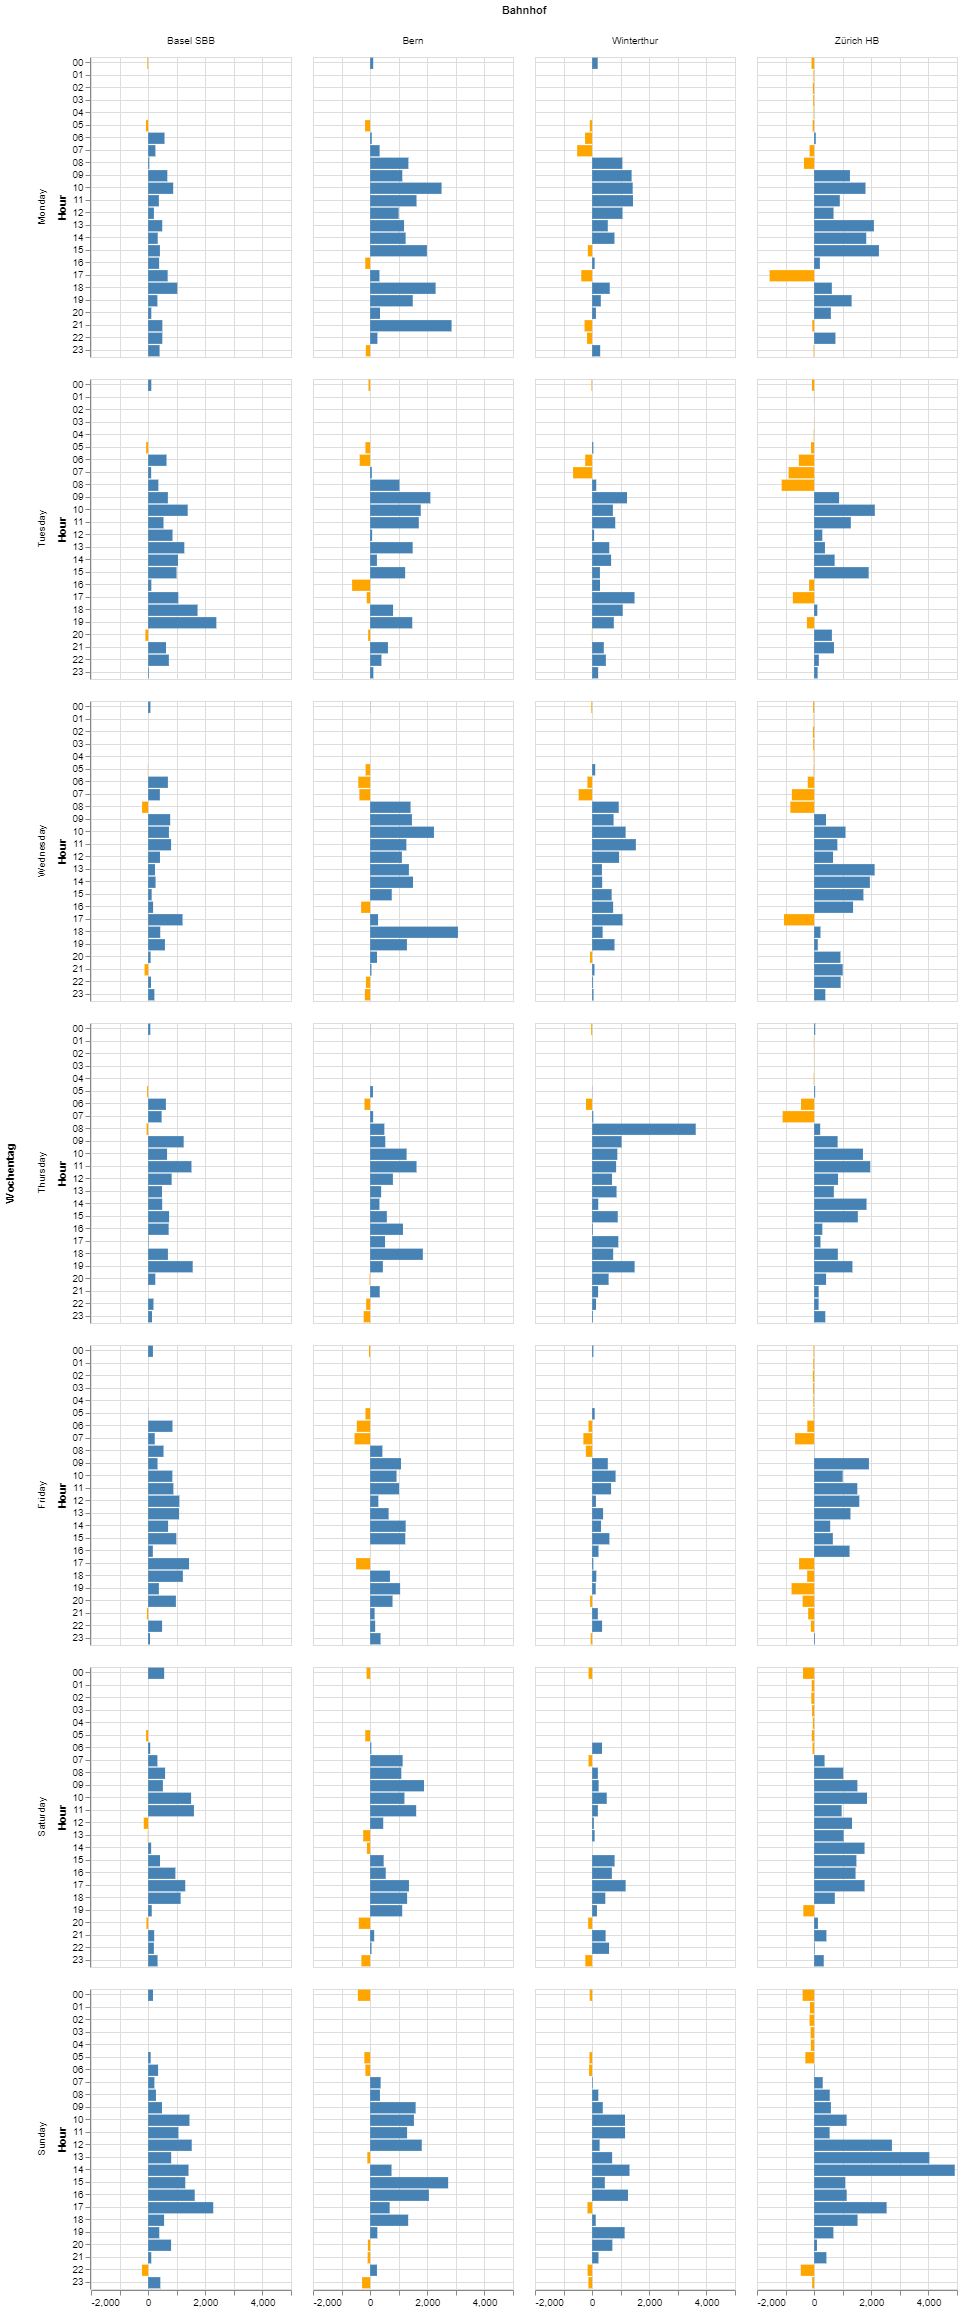

In [10]:
uplift_test.plot_pop_uplift(
    selectors={"Station": ["Zürich HB", "Bern", "Basel SBB", "Winterthur"]},
    plot_properties={"width": 200, "height": 300},
)

## Heatmap of all slots at all stations

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
result = uplift_test.result

chart_data = result.pivot_table(
    index=["DayOfWeek", "Hour"],
    columns="Station",
    values="pop_uplift_pers",
    aggfunc="sum"
)

chart_data

Station             Aarau   Basel SBB  Bellinzona         Bern  Biel/Bienne  \
DayOfWeek Hour                                                                
Friday    00    -2.049308  167.418889   -0.679345   -41.495677    -6.459714   
          01     0.000000    0.000000    0.000000     0.000000     0.000000   
          02     0.000000    0.000000    0.000000     0.000000     0.000000   
          03     0.000000    0.000000    0.000000     0.000000     0.000000   
          04     0.000000    0.000000    0.000000     0.000000     0.000000   
...                   ...         ...         ...          ...          ...   
Wednesday 19    -8.573041  587.368061    0.007674  1287.940233   121.841382   
          20    -3.746660   87.331801   -6.204703   240.611590    35.713410   
          21     5.982046 -125.328162   -4.392059    45.793594    43.243069   
          22    18.323627   99.800211   -3.095394  -147.184774    -6.169713   
          23     1.766771  218.186647   -1.761029  -185.760440   132.791888   

Station             Brig        Chur  Fribourg  Genève Aéroport  \
DayOfWeek Hour                                                    
Friday    00   -0.598430   -5.517836 -1.045623              0.0   
          01    0.000000    0.000000  0.000000              0.0   
          02    0.000000    0.000000  0.000000              0.0   
          03    0.000000    0.000000  0.000000              0.0   
          04    0.000000    0.000000  0.000000              0.0   
...                  ...         ...       ...              ...   
Wednesday 19   -6.558304  -71.125161 -5.650809              0.0   
          20   -5.488787  -50.448436 -6.503287              0.0   
          21   -3.887559  122.665108  6.309937              0.0   
          22   -2.744520  104.478132 -4.455198              0.0   
          23   -1.552781   12.336036 -2.743778              0.0   

Station         Genève Cornavin  ...  Winterthur       Zug  Zürich Enge  \
DayOfWeek Hour                   ...                                      
Friday    00         -20.351816  ...   43.571464 -2.173187    -0.935910   
          01           0.000000  ...    0.000000  0.000000     0.000000   
          02           0.000000  ...    0.000000  0.000000     0.000000   
          03           0.000000  ...    0.000000  0.000000     0.000000   
          04           0.000000  ...    0.000000  0.000000     0.000000   
...                         ...  ...         ...       ...          ...   
Wednesday 19        -159.853342  ...  782.480790 -2.277167   -12.114487   
          20        -163.938901  ...  -76.264183  0.246706    -6.045803   
          21          77.598809  ...   81.484280 -6.445168     5.936529   
          22        -100.034177  ...   33.288615  2.720744    -1.181274   
          23         -69.573110  ...   48.562218 -5.653773    -2.428498   

Station         Zürich Flughafen  Zürich Flughafen - Airside  \
DayOfWeek Hour                                                 
Friday    00           -1.090022                         0.0   
          01            0.000000                         0.0   
          02            0.000000                         0.0   
          03            0.000000                         0.0   
          04            0.000000                         0.0   
...                          ...                         ...   
Wednesday 19           -6.333675                         0.0   
          20            1.025475                         0.0   
          21           -3.484612                         0.0   
          22           -4.432137                         0.0   
          23           -2.884705                         0.0   

Station         Zürich Flughafen - Landside   Zürich HB  Zürich Hardbrücke  \
DayOfWeek Hour                                                               
Friday    00                            0.0  -27.881928                0.0   
          01                            0.0  -33.256594  